<a href="https://colab.research.google.com/github/Knowsoeun/AI_Study/blob/main/(CNN)MNIST%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# package를 import한다.
""" 
package : 다른 사람들이 만들어 놓은 것을 가져와서 사용
"""
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


import matplotlib.pyplot as plt

In [34]:
# MNIST 데이터를 가져오고 적절히 가공한다.

img_rows, img_cols = 28, 28

# train 데이터와 test데이터로 나눈다.
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
"""
mnist.load_data() : 실제로 MNIST 데이터를 가져오는 코드 
MNIST데이터는 train와 test 데이터가 들어있으므로 두 개로 가져왔다.

x : 실제 이미지 저장
y : 이미지가 어떤 숫자인지 데이터 저장
"""
print(K.image_data_format())

# 받은 이미지 데이터 구조를 재구성한다.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

"""
이미지 데이터의 색은 8비트의 정수로 되어있다. tensorflow의 경우에는 데이터 입력을 받을 때 데이터가 부동소수점인 것을
선호하므로 float32로 바꿔준다. 
하나의 픽셀이 8비트로 표시되었으므로 0~255로 값을 가진다.
tensorflow는 0~1 이내의 값을 선호하므로 /255를 해서 0~1이내의 값으로 만들어준다.

"""
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

"""
y쪽 데이터에서 이미지가 어떤 숫자인지를 나타내는 것도 바꿔주어야 한다. 
MNIST 데이터 셋 자체는 각각의 이미지에 대해서 그 숫자가 무엇인지 y에 적혀있다.
CNN 출력은 어떤 것에 대해서 답이 5, 3이 나오는게 아니라 10개의 출력 데이터가 나오고 각각의 확률값이 나오는 것이므로
MNIST 데이터셋에서 가져온 y데이터와 CNN 출력을 맞춰주어야 한다.
ex) 정답이 5이면 -> 0~9까지의 숫자중에 5일 확률이 1이고, 나머지에 대해선 확률이 0이다.
"""
# 클래스 벡터를 바이너리 클래스 행렬로 변환한다.
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

channels_last
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [35]:
# CNN 모델
model = Sequential()
"""
Sequential : CNN을 구성하는 층들을 차례차례 하나씩 기술하면, 
             바로 앞에 기술된 층의 출력이 바로 다음에 있는 층의 입력으로 사용된다.
"""
model.add(Conv2D(32, kernel_size=(3, 3),  # layer1 : 합성곱층. (커널 3x3. 필터수 32개. 활성화 함수 relu)
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu')) # layer2 : 합성곱층. (커널 3x3. 필터수 64개. 활성화 함수 relu)
model.add(MaxPooling2D(pool_size=(2, 2))) # layer3 : 가로, 세로 길이가 각각 절반으로 줄어든다. 
model.add(Dropout(0.25)) # layer4 : 학습을 용이하게 하기 위해 넣는 층
model.add(Flatten())     # layer5 : 합성곱층3차원 -> 완전연결층1차원이므로 Flatten(3차원을 1차원으로 구조 변경)을 쓴다.
model.add(Dense(128, activation='relu')) # layer6 : 완전연결층. (출력 128개. 활성화 함수 relu)
model.add(Dropout(0.5)) # layer7 : 학습을 용이하게 하기 위해 넣는 층
model.add(Dense(10, activation='softmax')) # layer8 : 총 10개이므로 10으로 함. (활성화 함수 softmax)

# summarize model.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                      

In [42]:
# 어떻게 학습할지를 지정한다.
import tensorflow as tf 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.optimizers.Adadelta(),
              metrics=['accuracy'])

# model.fit으로 실제 학습을 한다.
history = model.fit(x_train, y_train,
          batch_size=256, # Batch_size : CNN을 학습하는 방법에서 이용되는 개념
                          # 128개 학습데이터를 처리할 때마다 한번씩 내부의 계수를 업데이트한다는 의미.
          epochs=1,  # Epochs : 학습 데이터 안에 있는 모든 이미지를 1회에 한번에 다 처리하는 것.
                      # 모든 이미지를 12번 사용하는 동안 학습한다는 의미.
          verbose=1,
          validation_data=(x_test, y_test))


235/235 [==============================] - 174s 737ms/step - loss: 2.2713 - accuracy: 0.1469 - val_loss: 2.2496 - val_accuracy: 0.2129


In [43]:
# 테스트 데이터로 방금 학습된 CNN model를 평가한다.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) # loss : CNN이 예측한 값이 얼마나 틀렸는지 나타내는 정도
print('Test accuracy:', score[1])

Test loss: 2.2495813369750977
Test accuracy: 0.21289999783039093


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


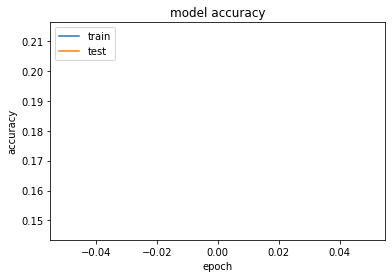

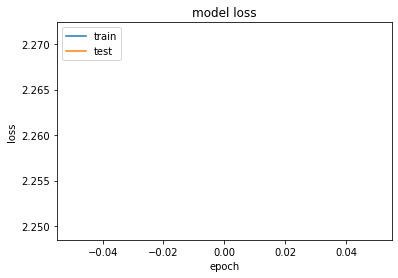

In [44]:
# 학습이 어떤 과정을 통해서 이루어졌는지를 확인한다.
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
# 학습한 모델을 저장한다. 
"""
*텐서플로우에서 CNN을 저장하는 방법 2가지
첫번째. CNN구조와 CNN에서 학습된 계수들의 데이터를 따로 저장한다.
두번째. CNN의 구조와 계수를 함께 저장한다.
"""
model.save("mnist_cnn.h5")
print("Saved model to disk")

Saved model to disk
